# Project: Train car to drive up steep slope

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import gym
from agents.agent import DDPG

import matplotlib.pyplot as plt
%matplotlib inline

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

## Experiment with agent in gym

In [ ]:
# This is nice if you interupt the learning while rendering.
# This will automatically close the previous session.
try:
    agent.task.close()
except:
    pass


# env = gym.make('MountainCarContinuous-v0')
env = gym.make('Pendulum-v0')
agent = DDPG(env, gym=True) 
agent.noise.sigma = 0.2
agent.noise.theta = 0.05

state = agent.task.reset()

scores = []
best_score = -np.inf
best_traj = []
step_count = 0
for i_episode in range(1000):
    # Learning
    state = agent.reset_episode() # start a new episode
    score = 0.0
    for _ in range(500):
        step_count += 1
        action = agent.act(state) 
        next_state, reward, done, _ = agent.task.step(action)
        score += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        agent.task.render()
        if done:
            break
    
    # Evaluate
#     if i_episode%1 == 0:
#         state = agent.reset_episode() # start a new episode
#         score = 0.0
#         for _ in range(300):
#             step_count += 1
#             action = agent.act(state) 
#             state, reward, done, _ = env.step(action)
#             score += reward
#             env.render()
#             if done:
#                 break

    scores.append(score)
    if score > best_score:
        best_score = agent.score
    print("\rEpisode = {:4d}, score = {:.3f}, best = {:.3f}".format(
        i_episode, score, best_score), end="")

#     if score > 95:
#         break
    sys.stdout.flush()
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =  117, score = -143.087, best = -119.23498

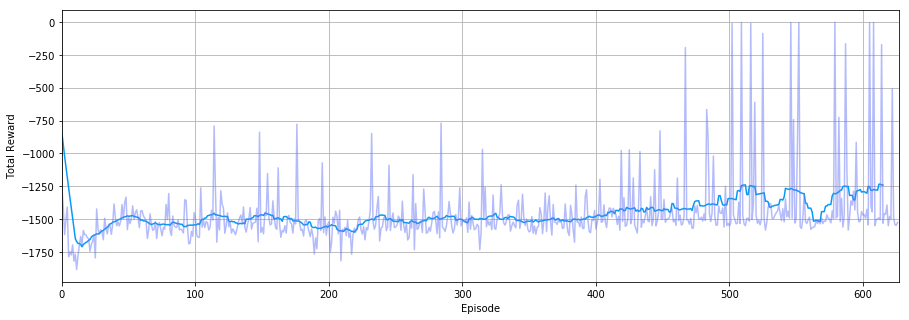

In [26]:
smooth = 21
plt.figure(figsize=(15,5))
plt.plot(np.convolve(scores, np.ones(smooth)/smooth)[(smooth-1)//2:-smooth], color='xkcd:azure')
plt.plot(scores, alpha=0.5, color='xkcd:cornflower')
plt.xlabel("Episode")
plt.ylabel('Total Reward')
plt.xlim(0, len(scores))
plt.grid(True)

In [23]:
print(np.shape(agent.actor_local.model.get_weights()))
print(np.shape(agent.critic_local.model.get_weights()))

(12,)
(28,)


In [19]:
# env.close()
# env = gym.make('MountainCarContinuous-v0')
# state = env.reset()
# print(state)
state = agent.reset_episode()
Q = []
rewards = []
for i in range(300):
    action = agent.act(state) 
#     action = agent.actor_local.model.predict_on_batch([[state]])[0]
    Q.append(agent.critic_target.model.predict_on_batch([[state], [action]])[0])
    state, reward, done, _ = agent.task.step(action)
    
    rewards.append(reward)
#     agent.task.render()
    if done:
        break;
# agent.task.close()

In [10]:
env.close()

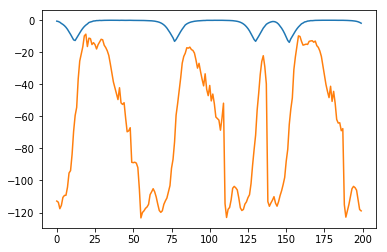

In [27]:

plt.plot(rewards)
# plt.plot(np.cumsum(rewards[::-1])[::-1])
plt.plot(Q)
plt.show()

In [22]:
actions = np.linspace(-1,1, 100).reshape(-1,1)
states = np.ones_like([actions,2])*[-0.9, 0.1]
Q = agent.critic_target.model.predict_on_batch([[states], actions])
plt.plot(actions, Q)
plt.show()

ValueError: Error when checking : expected states to have shape (None, 3) but got array with shape (1, 2)

In [170]:
agent.critic_target.model.predict_on_batch([[state], [action]])

array([[-8.231814]], dtype=float32)

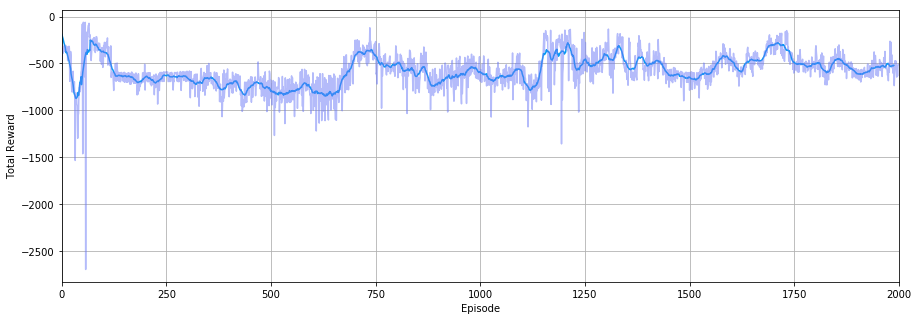

In [81]:
smooth = 21
plt.figure(figsize=(15,5))
plt.plot(np.convolve(score, np.ones(smooth)/smooth)[(smooth-1)//2:-smooth], color='xkcd:azure')
plt.plot(score, alpha=0.5, color='xkcd:cornflower')
plt.xlabel("Episode")
plt.ylabel('Total Reward')
plt.xlim(0, len(score))
plt.grid(True)
plt.show()

In [13]:
import numpy as np

test = np.array([1,2,3,4])
test[[0,1]]

a = set([1,2,3,4])
b = set([1])
a-b
# np.full_like(test, np.mean(test))

{2, 3, 4}